In [95]:
# Imports
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from operator import itemgetter
import math

In [90]:
# Setting Directory to the LCR Data Set.
# Then, sets up a Data Frame of the unfiltered data.
# Finally, prints out the unfiltered data as a table.
os.getcwd()
os.chdir('/Users/glatiolait/Documents/LCR/LCR_files+scripts')
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",")
tablelist = list(csv.reader(readed))
data_array = np.array(readed)
df = pd.DataFrame(data_array)
df

,0,1,2,3,4,5,6,7,8,9
0,0,4FGL J0001.2-0747,daily,239587201,239846401,0.0,0.0,2.18,0.0,2.44
1,1,4FGL J0001.5+2113,daily,239587201,239846401,NaN,NaN,NaN,0.0,0.52
2,2,4FGL J0003.3-1928,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
3,3,4FGL J0004.3+4614,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
4,4,4FGL J0004.4-4737,daily,239587201,239846401,0.0,0.0,2.97,0.0,8.93
...,...,...,...,...,...,...,...,...,...,...
4132745,4132745,4FGL J2358.0-4601,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132746,4132746,4FGL J2358.3-1021,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132747,4132747,4FGL J2358.3+3830,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132748,4132748,4FGL J2359.0+3922,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN


In [3]:
# Prompts the User for a selection of Cadence values. 
# I accounted for possible misspellings regarding capitalization.
# If the cadence value inputted is incorrect, then an error is displayed.
# The function then takes the inputted cadence string, and filters the DataFrame table with that.

cadence = input("Input Cadence Selection. (daily, weekly, or monthly) Case Sensitive.")
if cadence not in ['daily', 'Daily', 'weekly', 'Weekly', 'monthly', 'Monthly']:
    print("Error. Invalid option")

# This section takes the user input for cadence, and then outputs a data set for a random source within that cadence value.
# The randomsource variable takes a random name from the list, so some sources may be weighted far more heavily than others.
# I am not sure if the randomness is necessary, but it allowed an easy way to test multiple graphs.
# I have also included a default source name to check against consistently.

randomsource = np.random.choice(data_array[:,1])
randomsource = '4FGL J0001.2-0747'


# Prints out which source was randomly picked. Not necessary for using the default option.
print(randomsource)

# Filters the catalogue to only randomsource, cadence, sigma values larger than 4, and photon flux values greater than their error margins.
sortedsource = np.where((data_array[:,1] == randomsource) & (data_array[:,2]==cadence) & (data_array[:,-1] >= 4) & (data_array[:,6] < data_array[:,5]))

# Displays the dataframe to ensure everything is working as intended. Will omit in the future.
pd.DataFrame(data_array[sortedsource])

4FGL J0001.2-0747


,0,1,2,3,4,5,6,7,8,9
0,22875,4FGL J0001.2-0747,daily,242179201,242438401,0.0,0.0,3.11,0.0,11.88
1,42700,4FGL J0001.2-0747,daily,244512001,244771201,0.0,0.0,1.52,0.0,22.58
2,70150,4FGL J0001.2-0747,daily,247363201,247622401,0.0,0.0,0.89,0.0,10.63
3,99125,4FGL J0001.2-0747,daily,250732801,250992001,0.0,0.0,3.81,102.0,4.2
4,126575,4FGL J0001.2-0747,daily,253843201,254102401,0.0,0.0,4.57,102.0,4.01
...,...,...,...,...,...,...,...,...,...,...
139,3702700,4FGL J0001.2-0747,daily,651456001,651715201,0.0,0.0,3.29,0.0,6.63
140,3829275,4FGL J0001.2-0747,daily,665452801,665712001,0.0,0.0,3.43,0.0,4.84
141,3847575,4FGL J0001.2-0747,daily,667526401,667785601,0.0,0.0,2.01,0.0,4.69
142,3961950,4FGL J0001.2-0747,daily,680227201,680486401,0.0,0.0,1.22,0.0,14.92


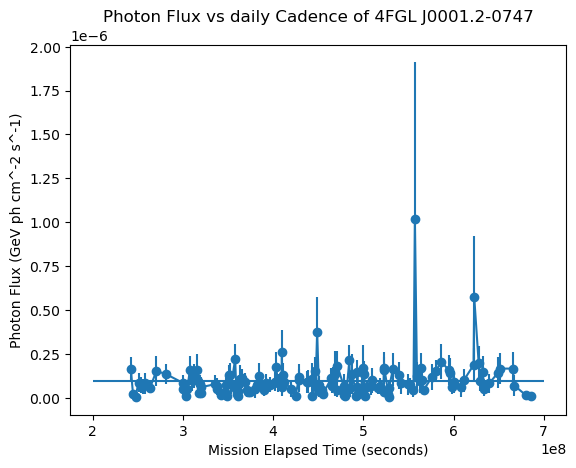

In [4]:
# This block of code is where a majority of the plots will go.

GraphTest = (data_array[sortedsource])
Plot = pd.DataFrame(GraphTest)
ysize = Plot.size
x = pd.DataFrame(GraphTest[:,3]/(60*60*24*365))

# The title displays the name of the graph, with references that will vary the cadence and name of the source.
plt.title("Photon Flux vs " +GraphTest[0,2]+ " Cadence of "+GraphTest[0,1])

# The x-axis displays the time elapsed in seconds. I would like to convert this to be a range of years.
plt.xlabel("Mission Elapsed Time (seconds)")

# The y-axis displays the Photon Flux. I don't believe the numerical labels are correct, but the shape of the graph appears to be correct.
plt.ylabel("Photon Flux (GeV ph cm^-2 s^-1)")

# This is the actual function that plots the data. At the moment, it plots column 3 (Time) vs column 5 (Photon Flux)
#Graph = plt.plot(Plot[3],Plot[5])
plt.errorbar(Plot[3],Plot[5],yerr=Plot[6],fmt = 'o-')
plt.hlines(np.mean(GraphTest[:,5]),2e8,7e8)

In [5]:
# This is the setup of the main loop to analyze one source.
# This loop can be modified to display either the factors of average flux at any time bin, or can be used to display a binary array
# Of "If above average flux, value is 1. If below, value is 0."
# At the moment, the loop will display an array of the factors at each time bin.
base = np.zeros(len(GraphTest))
averageflux = np.mean(GraphTest[:,5])
factors = GraphTest[:,5]/averageflux
emptyarray = [0]
j = 0
k = 0
emptyarray=[0]
while j < len(base):
    if (factors[j] < 1) and (factors[j-1]) > 0:
        emptyarray.append(0)
        k+=1
    elif factors[j] > 0:
        emptyarray[k] = 1
    j+=1

print(emptyarray)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]


In [48]:
# This is the big loop that processes the entire database. It performs an evaluation of the flux for each source at each time bin.
# The inner loop creates a time-domain array of how far above or below the average flux that the flux at each time bin.
# It then takes this array, and adds it to a list of each source name. Associated with each source is also the average flux, which was used in reference to the factor array.
# This is repeated for all sources, which at the moment is about 1500+.
# The name of the final DataFrame that contains all of this info is a placeholder. I will most likely change it when the time comes to present the code.

names = df.drop_duplicates(subset=[1], inplace=False)[1]
data_array = (data_array[np.where((data_array[:,2]==cadence))])
Esras = []
sourcenumber = 0
matrix = []
for name in names:
    print(name)
    source_array = (data_array[np.where(data_array[:,1] == name)])
    base = np.zeros(len(source_array))
    averageflux = np.nanmean(source_array[:,5])

    factors = source_array[:,5]/averageflux
    
    base[factors>1] = 1
    print(base)

    matrix.append(base)
    Esras.append((names[sourcenumber],base,averageflux))
    sourcenumber += 1



4FGL J0001.2-0747
[0. 0. 0. ... 0. 0. 0.]
4FGL J0001.5+2113
[0. 0. 0. ... 0. 0. 0.]
4FGL J0003.3-1928
[0. 0. 0. ... 0. 0. 0.]
4FGL J0004.3+4614
[0. 0. 0. ... 0. 0. 0.]
4FGL J0004.4-4737
[0. 0. 0. ... 0. 0. 0.]
4FGL J0004.4-4001
[0. 0. 0. ... 0. 0. 0.]
4FGL J0005.9+3824
[0. 0. 0. ... 0. 0. 0.]
4FGL J0007.7+4008
[0. 0. 0. ... 0. 0. 0.]
4FGL J0009.1-5012
[0. 0. 0. ... 0. 0. 0.]
4FGL J0009.3+5030
[0. 0. 0. ... 0. 0. 0.]
4FGL J0010.6+2043
[0. 0. 0. ... 0. 0. 0.]
4FGL J0010.6-3025
[0. 1. 0. ... 0. 0. 0.]
4FGL J0011.4+0057
[0. 1. 0. ... 0. 0. 0.]
4FGL J0014.1+1910
[0. 0. 0. ... 0. 0. 0.]
4FGL J0014.3-0500
[1. 0. 0. ... 0. 0. 0.]
4FGL J0014.9+3212
[0. 0. 0. ... 0. 0. 0.]
4FGL J0016.2-0016
[0. 0. 0. ... 0. 0. 0.]
4FGL J0017.0-0649
[0. 1. 0. ... 0. 0. 0.]
4FGL J0017.5-0514
[1. 1. 1. ... 0. 0. 0.]
4FGL J0019.2-5640
[0. 0. 0. ... 0. 0. 0.]
4FGL J0019.6+7327
[0. 0. 0. ... 0. 0. 0.]
4FGL J0021.5-2552
[0. 0. 0. ... 0. 0. 0.]
4FGL J0021.9-5140
[0. 0. 0. ... 0. 0. 0.]
4FGL J0022.5+0608
[0. 0. 0. ... 0.

/var/folders/td/mm4slxv90412jt0yh0zz6zgw0000gp/T/ipykernel_1939/384409283.py:16: RuntimeWarning: Mean of empty slice
  averageflux = np.nanmean(source_array[:,5])


[0. 0. 0. ... 0. 0. 0.]
4FGL J1040.5+0617
[0. 0. 0. ... 0. 0. 0.]
4FGL J1043.2+2408
[0. 0. 0. ... 0. 0. 0.]
4FGL J1044.6+8053
[0. 0. 0. ... 0. 0. 0.]
4FGL J1045.1-5940
[0. 1. 0. ... 0. 0. 0.]
4FGL J1045.8-2928
[1. 0. 0. ... 0. 0. 0.]
4FGL J1047.2-5517
[0. 0. 0. ... 0. 0. 0.]
4FGL J1047.2+6740
[0. 0. 0. ... 0. 0. 0.]
4FGL J1047.7+7238
[0. 0. 0. ... 0. 0. 0.]
4FGL J1047.8-6216
[0. 0. 0. ... 0. 0. 0.]
4FGL J1048.4+7143
[0. 0. 0. ... 0. 0. 0.]
4FGL J1049.8+1429
[0. 0. 0. ... 0. 0. 0.]
4FGL J1050.1+0432
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.4-3139
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.6+3253
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.6+2109
[0. 0. 0. ... 0. 0. 0.]
4FGL J1054.5+2211
[0. 0. 0. ... 0. 0. 0.]
4FGL J1056.8+7012
[0. 0. 0. ... 0. 0. 0.]
4FGL J1057.2+5510
[0. 0. 0. ... 0. 0. 0.]
4FGL J1057.3-2341
[0. 0. 0. ... 1. 0. 0.]
4FGL J1058.0+4305
[0. 0. 0. ... 0. 0. 0.]
4FGL J1058.4+0133
[0. 0. 0. ... 0. 0. 0.]
4FGL J1058.5+8115
[0. 0. 0. ... 0. 0. 0.]
4FGL J1058.6+2817
[0. 0. 0. ... 0. 0. 0.]
4FGL J1058

,0,1,2
0,4FGL J0001.2-0747,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.685541e-08
1,4FGL J0001.5+2113,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.205548e-07
2,4FGL J0003.3-1928,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",5.630945e-08
3,4FGL J0004.3+4614,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.718575e-01
4,4FGL J0004.4-4737,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8.683751e-02
...,...,...,...
1520,4FGL J2358.0-4601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.806769e-06
1521,4FGL J2358.3-1021,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8.063871e-08
1522,4FGL J2358.3+3830,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.209713e+01
1523,4FGL J2359.0+3922,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.002070e+01


In [137]:
fmatrix = []
Esras2 = []
for name in names:
    print(name)
    source_array = (data_array[np.where(data_array[:,1] == name)])
    averageflux = np.nanmean(source_array[:,5])

    factors = source_array[:,5]/averageflux

    fmatrix.append(factors)
    print(factors)
    Esras2.append((name,factors,averageflux))


pd.DataFrame(Esras2)

4FGL J0001.2-0747
[0.60043086 0.         0.         ... 0.         0.         0.        ]
4FGL J0001.5+2113
[0.         0.23550699 0.13509703 ... 0.         0.         0.        ]
4FGL J0003.3-1928
[0. 0. 0. ... 0. 0. 0.]
4FGL J0004.3+4614
[0.00000000e+00 3.93933636e-07 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
4FGL J0004.4-4737
[2.17818345e-06 0.00000000e+00 1.01446877e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
4FGL J0004.4-4001
[0. 0. 0. ... 0. 0. 0.]
4FGL J0005.9+3824
[0. 0. 0. ... 0. 0. 0.]
4FGL J0007.7+4008
[0.00000000e+00 1.18006274e-10 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
4FGL J0009.1-5012
[0. 0. 0. ... 0. 0. 0.]
4FGL J0009.3+5030
[0.         0.00112071 0.00066201 ... 0.         0.         0.        ]
4FGL J0010.6+2043
[0.1967591  0.38488842 0.38661437 ... 0.         0.         0.        ]
4FGL J0010.6-3025
[1.0389771  1.42185596 0.89957946 ... 0.         0.         0.        ]
4FGL J0011.4+0057
[0.         1.27926

/var/folders/td/mm4slxv90412jt0yh0zz6zgw0000gp/T/ipykernel_1939/1486424559.py:6: RuntimeWarning: Mean of empty slice
  averageflux = np.nanmean(source_array[:,5])


[0.         1.26072327 0.65870347 ... 0.         0.         0.        ]
4FGL J1038.8-5312
[0.        0.        0.6929301 ... 0.        0.        0.       ]
4FGL J1040.5+0617
[0. 0. 0. ... 0. 0. 0.]
4FGL J1043.2+2408
[0. 0. 0. ... 0. 0. 0.]
4FGL J1044.6+8053
[0. 0. 0. ... 0. 0. 0.]
4FGL J1045.1-5940
[0.8201373  1.26080808 0.8201373  ... 0.         0.         0.        ]
4FGL J1045.8-2928
[2.74784067 0.39277045 1.92504092 ... 0.         0.         0.        ]
4FGL J1047.2-5517
[0. 0. 0. ... 0. 0. 0.]
4FGL J1047.2+6740
[0. 0. 0. ... 0. 0. 0.]
4FGL J1047.7+7238
[0.         0.54035747 0.48324652 ... 0.         0.         0.        ]
4FGL J1047.8-6216
[0.4521154  0.         0.34670647 ... 0.         0.         0.        ]
4FGL J1048.4+7143
[0. 0. 0. ... 0. 0. 0.]
4FGL J1049.8+1429
[0. 0. 0. ... 0. 0. 0.]
4FGL J1050.1+0432
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.4-3139
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.6+3253
[0. 0. 0. ... 0. 0. 0.]
4FGL J1051.6+2109
[0. 0. 0. ... 0. 0. 0.]
4FGL J1054.5+2211
[5.5

,0,1,2
0,4FGL J0001.2-0747,"[0.6004308573030182, 0.0, 0.0, 0.0, 0.56952632...",4.530080e-08
1,4FGL J0001.5+2113,"[0.0, 0.23550698570359943, 0.13509703055865394...",1.095509e-07
2,4FGL J0003.3-1928,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2369982468705...",4.388218e-08
3,4FGL J0004.3+4614,"[0.0, 3.939336356513123e-07, 0.0, 0.0, 0.0, 0....",2.018106e-01
4,4FGL J0004.4-4737,"[2.1781834464949773e-06, 0.0, 1.01446877183979...",4.958260e-02
...,...,...,...
1520,4FGL J2358.0-4601,"[0.06497379278932842, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.085053e-06
1521,4FGL J2358.3-1021,"[0.7425081088620921, 0.7277465162405793, 0.680...",6.774337e-08
1522,4FGL J2358.3+3830,"[0.0, 0.0, 0.0, 0.0, 8.230762700806881e-10, 3....",2.928040e+01
1523,4FGL J2359.0+3922,"[0.0, 1.1131586094916244e-09, 8.77903439444425...",1.742788e+01


In [7]:
Esras=pd.DataFrame(Esras).rename(columns={0: 'source_name', 1: 'flux_values',2: 'average_flux'})


NameError: name 'Esras' is not defined

In [29]:
Esras.to_csv(r'/Users/glatiolait/Documents/Exports/monthly_fluxFeb2023.csv')

In [9]:
Esras = pd.read_csv('/Users/glatiolait/Documents/Exports/daily_fluxFeb2023')

In [52]:
matrix=np.array(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(1525, 1773)


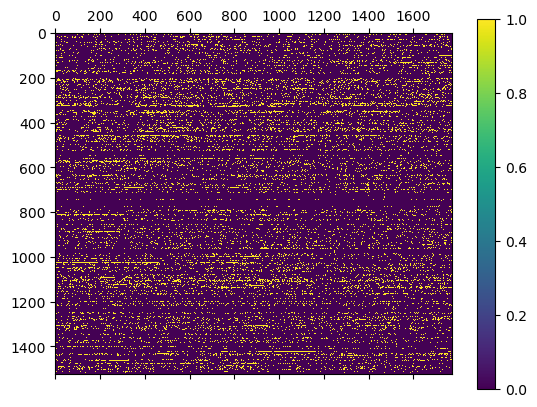

In [77]:
print(matrix)
print(matrix.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax)

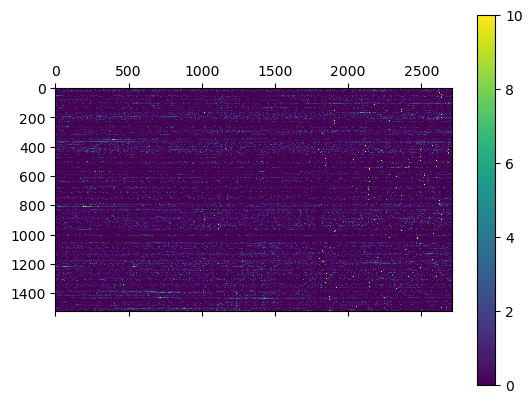

In [179]:

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(fmatrix, interpolation='nearest')
fig.colorbar(cax)
cax.set_clim(0,10)
